In [165]:
import pandas as pd
import numpy as np

df = pd.read_csv("/content/social_data.csv")
df.head()

,Published Date,Account,Account Type,Campaign Name,Total Impressions,Total Engagements,Media Type,Engagement Rate
0,03-31-2023 19:55,CSGO,TWITTER,N/A,0,0,Text,#DIV/0!
1,03-31-2023 19:49,CSGO,TWITTER,N/A,0,0,Text,#DIV/0!
2,03-31-2023 19:49,CSGO,TWITTER,N/A,0,0,Text,#DIV/0!
3,03-31-2023 19:49,CSGO,TWITTER,N/A,0,0,Text,#DIV/0!
4,03-31-2023 19:43,CSGO,TWITTER,Community Engagement,9517,1215,Video,12.76662814


In [166]:
# Exploring the structure of the dataframe.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3479 entries, 0 to 3478
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Published Date     3479 non-null   object
 1   Account            3479 non-null   object
 2   Account Type       3479 non-null   object
 3   Campaign Name      3479 non-null   object
 4   Total Impressions  3479 non-null   int64 
 5   Total Engagements  3479 non-null   int64 
 6   Media Type         3479 non-null   object
 7   Engagement Rate    3479 non-null   object
dtypes: int64(2), object(6)
memory usage: 217.6+ KB


In [167]:
# Remove extra spaces in 'Account' andcolumn. Before, we were getting 2 different values: 'General' and 'General '. 
df['Account'] = df['Account'].str.strip()
df['Campaign Name'] = df['Account'].str.strip()

In [168]:
# Calculate the engagement rate by adding an additional column called 'Engagement Rate' based on the formula below.
df['Engagement Rate'] = (df['Total Engagements'] / df['Total Impressions']).fillna(0) * 100

**Question 1 : What is the typical engagement rate we can expect?**

For answering this question, I have used mean function to find out the average engagement rate across all accounts and thorugh all media types.

In [169]:
df['Engagement Rate'].mean()

31.833090116954327

**Question 2 : What’s the likelihood that we can achieve a 15% engagement rate?**

The engagement rate of 15% can be found out by grouping the engagement rate having 15% or higher.

In [170]:
# Calculate the likelihood of achieving a 15% engagement rate
likelihood = len(df[df['Engagement Rate'] >= 15.00]) / len(df) * 100
print(f"The likelihood of achieving a 15% engagement rate is approximately: {likelihood:.5f}%")

The likelihood of achieving a 15% engagement rate is approximately: 6.49612%


**Question 3 : Does day of the week and time of posting affect engagement rates?**

After checking the structure of the dataframe, it was found that the 'Published Date' column was of type object. To answer the above question and to use the datetime() of pandas, I have first converted the column to the specified format. Then I have calculated the mean by grouping the date on days first and then hours. 

Next, I have printed the results and also built a time series graph using the matplot library to get a better understanding.

Lastly I ran ANOVA tests, to determine if there actually is a difference in the engagement rates for days and hours. The p-value for days was less than 0.05 hence, we can say that days do affect the engagement rates. While for the hours, the p-value was greater than 0.05, we could see the variability in the graph. So i ran ANOVA test for 5th hour and the rest, and it showed that 5th hour also affected the engagement rates.

In [171]:
# Convert 'Published Date' column to datetime format
df['Published Date'] = pd.to_datetime(df['Published Date'], format='%m-%d-%Y %H:%M')

# Extract day of the week and hour of the day from 'Published Date'
df['Day of Week'] = df['Published Date'].dt.day_name()
df['Hour of Day'] = df['Published Date'].dt.hour

# Calculate the average engagement rate by day of the week
avg_engagement_by_day = df.groupby('Day of Week')['Total Engagements'].mean() / df.groupby('Day of Week')['Total Impressions'].mean() * 100

# Calculate the average engagement rate by hour of the day
avg_engagement_by_hour = df.groupby('Hour of Day')['Total Engagements'].mean() / df.groupby('Hour of Day')['Total Impressions'].mean() * 100

print("Average Engagement Rate by Day of the Week:")
print(avg_engagement_by_day)

print("\nAverage Engagement Rate by Hour of the Day:")
print(avg_engagement_by_hour)

Average Engagement Rate by Day of the Week:
Day of Week
Friday        8.589578
Monday        6.715551
Saturday      4.843795
Sunday       10.598853
Thursday      8.975086
Tuesday      10.163740
Wednesday     7.818698
dtype: float64

Average Engagement Rate by Hour of the Day:
Hour of Day
0           NaN
2      0.840156
3      7.735241
4      8.936676
5     26.283342
6      8.075616
7     14.341286
8     10.429817
9      8.830372
10     6.545196
11     6.994685
12     5.958796
13     8.224653
14     9.853980
15     6.918330
16     9.341731
17    11.314157
18    10.134186
19     4.393994
20    13.386641
21     4.060993
22     2.674419
23     0.706333
dtype: float64


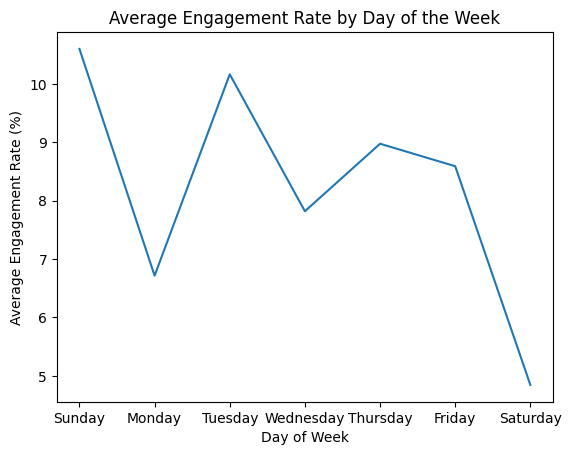

In [172]:
# Plots

import matplotlib.pyplot as plt
# Convert 'Published Date' column to datetime format
df['Published Date'] = pd.to_datetime(df['Published Date'], format='%m-%d-%Y %H:%M')

# Extract day of the week from 'Published Date'
df['Day of Week'] = df['Published Date'].dt.day_name()

# Calculate the average engagement rate by day of the week
avg_engagement_by_day = df.groupby('Day of Week')['Total Engagements'].mean() / df.groupby('Day of Week')['Total Impressions'].mean() * 100

# Define the order of the days of the week
day_order = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']

# Reindex the average engagement rates Series to follow the specified day order
avg_engagement_by_day = avg_engagement_by_day.reindex(day_order)

# Plot the average engagement rates
avg_engagement_by_day.plot(kind='line')

# Set the labels and title
plt.xlabel('Day of Week')
plt.ylabel('Average Engagement Rate (%)')
plt.title('Average Engagement Rate by Day of the Week')

# Show the plot
plt.show()


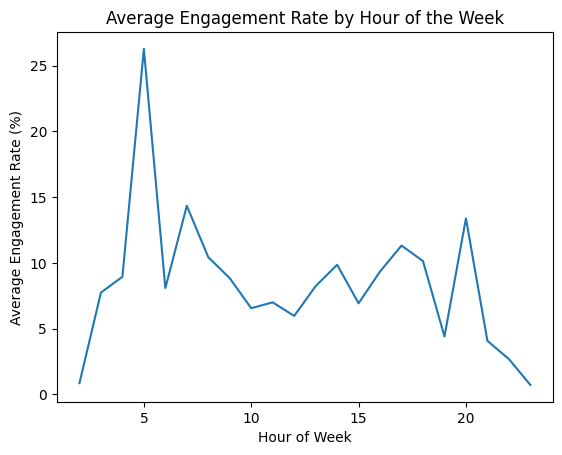

In [173]:
plt.xlabel('Hour of Week')
plt.ylabel('Average Engagement Rate (%)')
plt.title('Average Engagement Rate by Hour of the Week')
plt.plot(avg_engagement_by_hour)

In [174]:
# ANOVA tests

from scipy.stats import f_oneway

df['Published Date'] = pd.to_datetime(df['Published Date'], format='%m-%d-%Y %H:%M')

# Extract day of the week and hour of the day from 'Published Date'
df['Day of Week'] = df['Published Date'].dt.day_name()
df['Hour of Day'] = df['Published Date'].dt.hour

# Perform ANOVA test for day of the week
day_of_week_groups = [df[df['Day of Week'] == day]['Total Engagements'] for day in df['Day of Week'].unique()]
fvalue, pvalue = f_oneway(*day_of_week_groups)

print("ANOVA Test Results for Day of the Week:")
print("F-value:", fvalue)
print("p-value:", pvalue)

# Perform ANOVA test for hour of the day
hour_of_day_groups = [df[df['Hour of Day'] == hour]['Total Engagements'] for hour in df['Hour of Day'].unique()]
fvalue, pvalue = f_oneway(*hour_of_day_groups)

print("\nANOVA Test Results for Hour of the Day:")
print("F-value:", fvalue)
print("p-value:", pvalue)

ANOVA Test Results for Day of the Week:
F-value: 2.7042378858541096
p-value: 0.012734992843664668

ANOVA Test Results for Hour of the Day:
F-value: 1.4383363477347344
p-value: 0.0846516926585063


In [175]:
# Comparision of timing at 5 with others


df['Published Date'] = pd.to_datetime(df['Published Date'], format='%m-%d-%Y %H:%M')

# Extract hour of the day from 'Published Date'
df['Hour of Day'] = df['Published Date'].dt.hour

# Perform ANOVA test comparing hour 5 with other hours
hour_5_group = df[df['Hour of Day'] == 5]['Total Engagements']
other_hours_group = df[df['Hour of Day'] != 5]['Total Engagements']

fvalue, pvalue = f_oneway(hour_5_group, other_hours_group)

print("ANOVA Test Results for Hour 5 vs. Other Hours:")
print("F-value:", fvalue)
print("p-value:", pvalue)

ANOVA Test Results for Hour 5 vs. Other Hours:
F-value: 9.942146935584054
p-value: 0.001629131543731628


**Question 4:How are our game titles doing in terms of social performance? Is there a specific game we should focus more on or less?**

The games details can be found out by looking at the 'Account' column in the dataframe. Next I grouped the dataset based on "Accounts' and calculated the sum of the 'Total Impressions' and 'Total Engagements'. The engagement rate was calculated for the groups and a bar plot was plotted to get a better understanding of the social performance for different games/accounts.

Note: As the General game had more observations, while plotting the bar graph, it was shadowing all other games. Hence, I used log transformations to see the patterns/ metrics of Social performance. I also used separate graphs for each metric.

In [176]:
df['Account'].unique()

array(['CSGO', 'General', 'DOTA2', 'Content Creators', 'Valorant'],
      dtype=object)

In [177]:
# Group the data by account and calculate the total impressions and total engagements
account_performance = df.groupby('Account').agg({
    'Total Impressions': 'sum',
    'Total Engagements': 'sum'
})

# Calculate the engagement rate for each account
account_performance['Engagement Rate'] = (account_performance['Total Engagements'] / account_performance['Total Impressions']) * 100

# Sort the accounts based on the engagement rate in descending order
sorted_accounts = account_performance.sort_values('Engagement Rate', ascending=False)

# Print the sorted account performance
print(sorted_accounts)

                  Total Impressions  Total Engagements  Engagement Rate
Account                                                                
General                    33931757            3077328         9.069168
DOTA2                       1859326             123990         6.668545
Valorant                      22979                931         4.051525
CSGO                        2313918              92336         3.990461
Content Creators              45186               1387         3.069535


In [178]:
sorted_accounts

,Total Impressions,Total Engagements,Engagement Rate
Account,,,
General,33931757,3077328,9.069168
DOTA2,1859326,123990,6.668545
Valorant,22979,931,4.051525
CSGO,2313918,92336,3.990461
Content Creators,45186,1387,3.069535


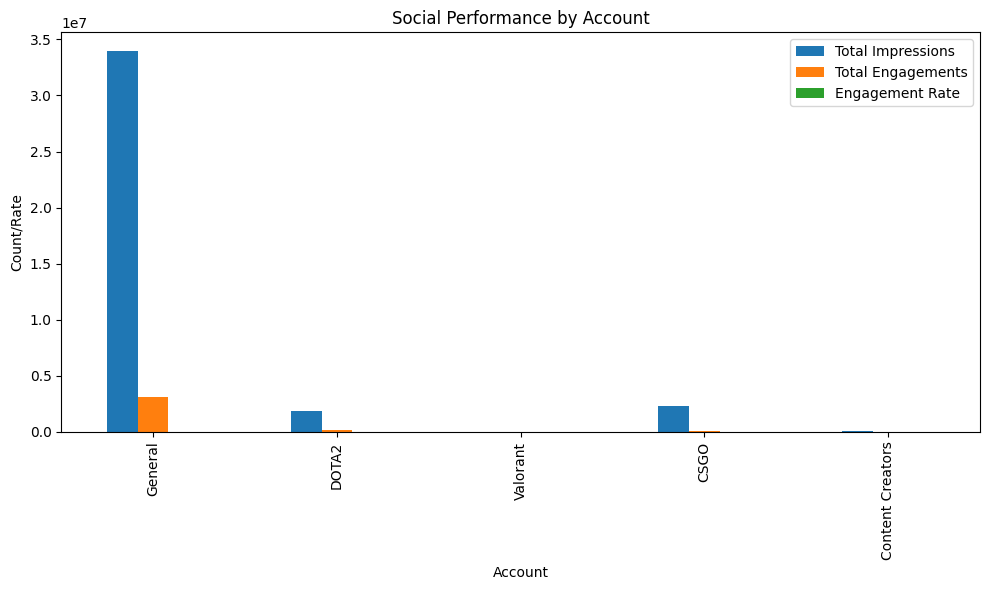

In [179]:
# Plot the DataFrame without any transformation
fig, ax = plt.subplots(figsize=(10, 6))
sorted_accounts.plot.bar(ax=ax, logy=False)

# Set the y-axis label and the title
ax.set_ylabel('Count/Rate')
ax.set_title('Social Performance by Account')

# Display the plot
plt.tight_layout()
plt.show()

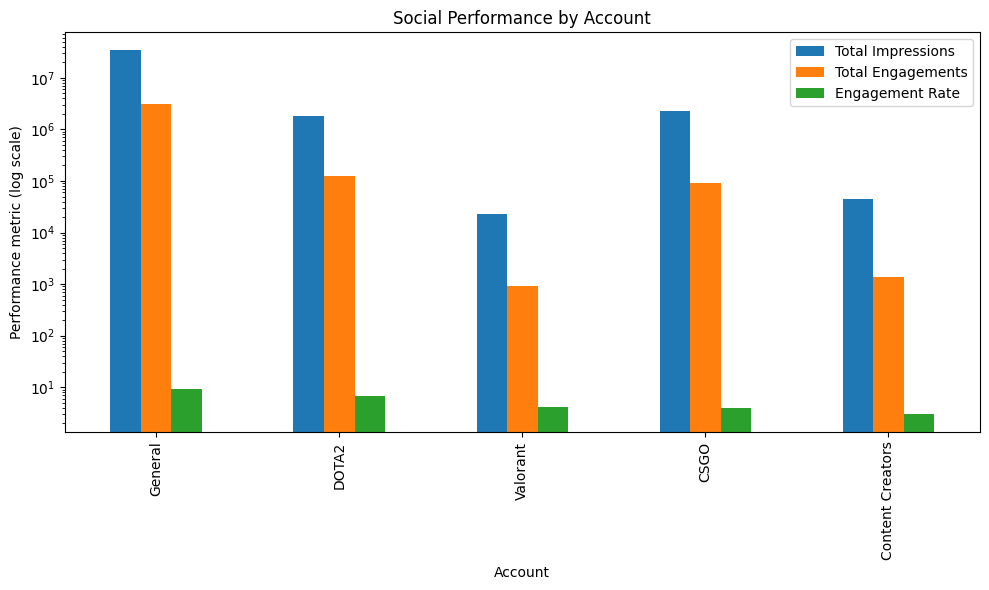

In [180]:
# Plot the DataFrame with a logarithmic scale on the y-axis
fig, ax = plt.subplots(figsize=(10, 6))
sorted_accounts.plot.bar(ax=ax, logy=True)

# Set the y-axis label and the title
ax.set_ylabel('Performance metric (log scale)')
ax.set_title('Social Performance by Account')

# Display the plot
plt.tight_layout()
plt.show()

<ipython-input-181-398a7e908d40>:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(sorted_accounts.index, rotation=45, ha='right')


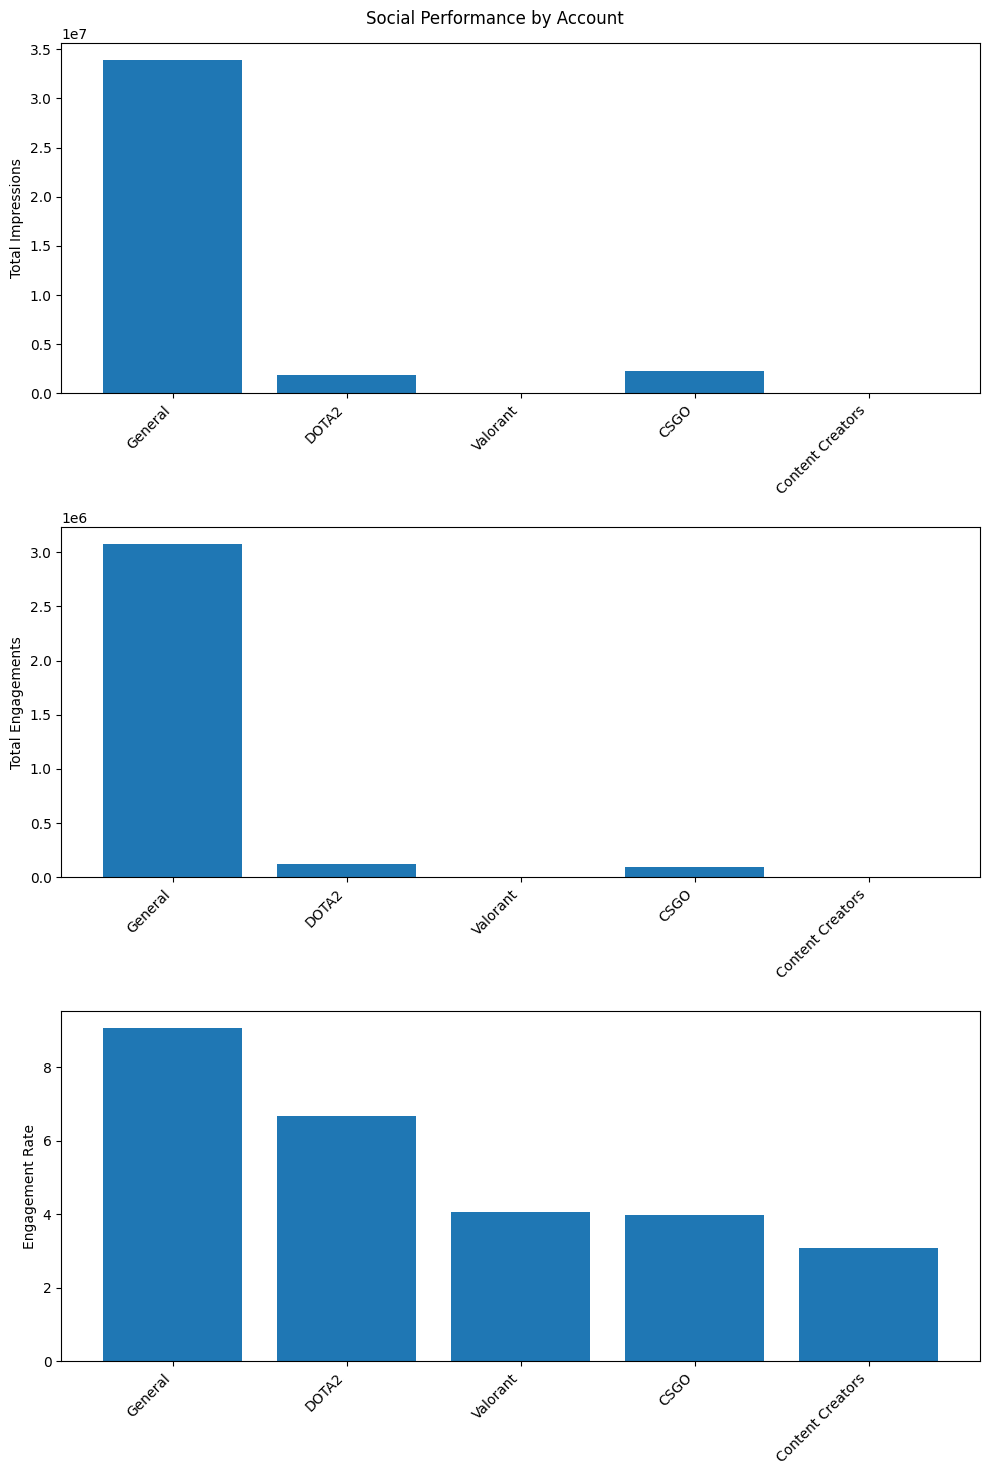

In [181]:
# Plot the bar graphs
fig, axs = plt.subplots(3, 1, figsize=(10, 15))

# Plot 1: Total Impressions
axs[0].bar(sorted_accounts.index, sorted_accounts.loc[sorted_accounts.index, 'Total Impressions'])
axs[0].set_ylabel('Total Impressions')

# Plot 2: Total Engagements
axs[1].bar(sorted_accounts.index, sorted_accounts.loc[sorted_accounts.index, 'Total Engagements'])
axs[1].set_ylabel('Total Engagements')

# Plot 3: Engagement Rate
axs[2].bar(sorted_accounts.index, sorted_accounts.loc[sorted_accounts.index, 'Engagement Rate'])
axs[2].set_ylabel('Engagement Rate')

# Set the x-axis labels and rotate them for better visibility
for ax in axs:
    ax.set_xticklabels(sorted_accounts.index, rotation=45, ha='right')

# Set the title
fig.suptitle('Social Performance by Account')

# Adjust the spacing between subplots
plt.tight_layout()

# Display the plots
plt.show()


Text(0.5, 1.0, 'Engagement Rate by Account')

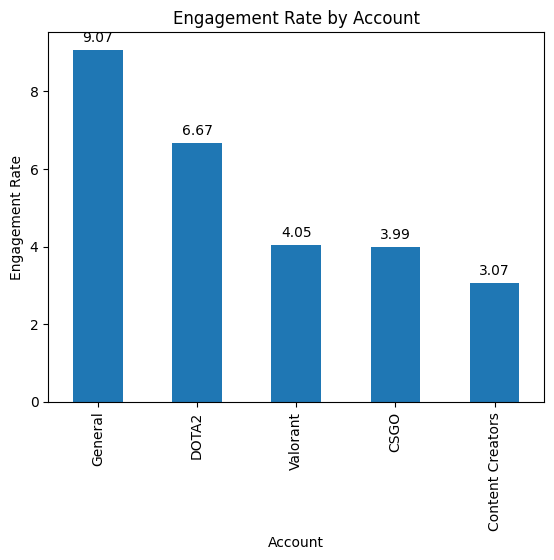

In [182]:
# Create the bar plot
sorted_accounts['Engagement Rate'].plot(kind='bar')

ax = sorted_accounts['Engagement Rate'].plot(kind='bar')

# Add text labels on top of each bar
for i, v in enumerate(sorted_accounts['Engagement Rate']):
    ax.text(i, v + 0.2, f'{v:.2f}', ha='center')


# Set plot labels and title
plt.xlabel('Account')
plt.ylabel('Engagement Rate')
plt.title('Engagement Rate by Account')


**Question 5: What media type performs the best?**

To answer this question, I first grouped by Media types. Then I calculated the mean/average of each group of Media. Next I sorted them and lastly I ploted a bar graph.


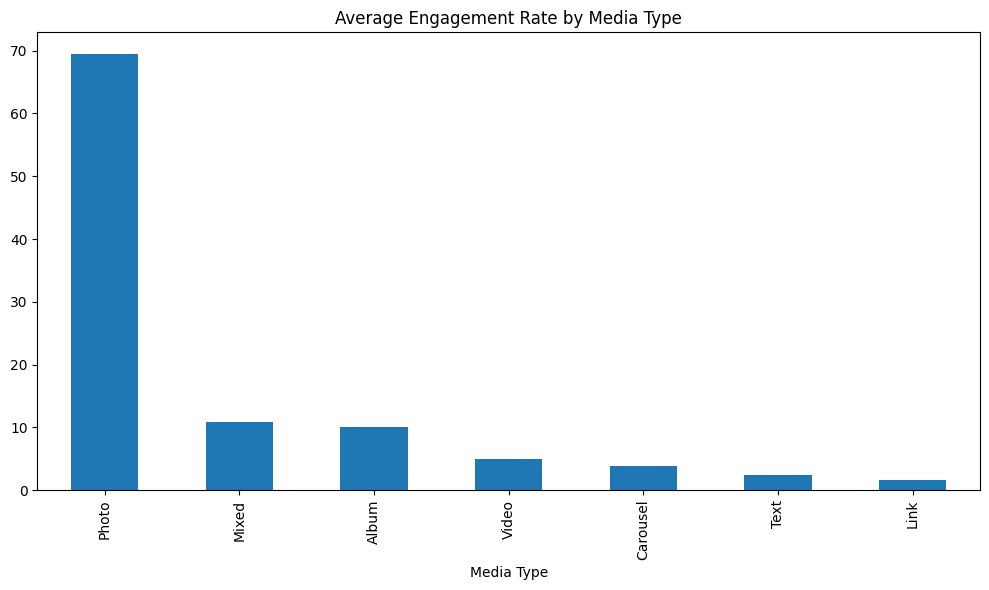

In [183]:
# Calculate the average engagement rate by media type
avg_engagement_by_media = df.groupby('Media Type')['Engagement Rate'].mean()

# Sort the media types by their average engagement rate
sorted_media = avg_engagement_by_media.sort_values(ascending=False)

# Plot the average engagement rate by media type
sorted_media.plot(kind='bar', figsize=(10, 6))

# Set the x-axis label and the title
plt.xlabel('Media Type')
plt.title('Average Engagement Rate by Media Type')

# Display the plot
plt.tight_layout()
plt.show()

**Question 6: What is our best performing campaign?**

To answer this question, I first grouped by 'Campaign Name' column. Then I calculated the total/sum of each group of Campaign. Next I sorted them and lastly I ploted a bar graph.

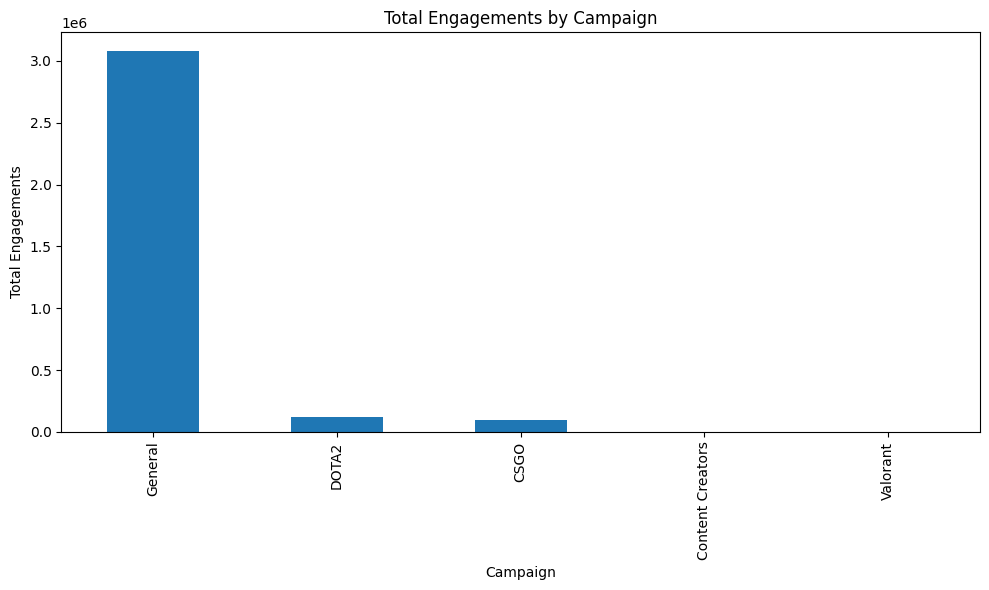

Best Performing Campaign: General


In [184]:
df_campaign = df[df['Campaign Name'] != 'N/A']
# Calculate the total engagements for each campaign
total_engagements_by_campaign = df_campaign.groupby('Campaign Name')['Total Engagements'].sum()

# Sort the campaigns by their total engagements
sorted_campaigns = total_engagements_by_campaign.sort_values(ascending=False)

# Get the best performing campaign (campaign with the highest total engagements)
best_performing_campaign = sorted_campaigns.index[0]

# Plot the total engagements by campaign
fig, ax = plt.subplots(figsize=(10, 6))
sorted_campaigns.plot.bar(ax=ax)

# Set the x-axis and y-axis labels and the title
ax.set_xlabel('Campaign')
ax.set_ylabel('Total Engagements')
ax.set_title('Total Engagements by Campaign')

# Display the plot
plt.tight_layout()
plt.show()

print("Best Performing Campaign:", best_performing_campaign)

I have tried to find out the best performing platform to get the idea of the engagement rates for general media and photo type media after finding out that photo is the best performing media. 

In [185]:
# Group by Account Type and calculate the sum of Engagement Rate
engagement_rate_by_account_type = df.groupby('Account Type')['Engagement Rate'].mean()

# Sort the account types based on the total engagement rate
sorted_account_types = engagement_rate_by_account_type.sort_values(ascending=False)

# Retrieve the account type with the highest engagement rate
best_account_type = sorted_account_types.index[0]

print("Account Type with the Highest Engagement Rate:", best_account_type)


df1 = df[df['Media Type'] == 'Photo']
df1.head()

# Group by Account Type and calculate the sum of Engagement Rate
engagement_rate_by_account_type_media = df1.groupby('Account Type')['Engagement Rate'].mean()

# Sort the account types based on the total engagement rate
sorted_account_types_media = engagement_rate_by_account_type_media.sort_values(ascending=False)

# Retrieve the account type with the highest engagement rate
best_account_type_media = sorted_account_types_media.index[0]

print("Account Type with the Highest Engagement Rate for Photo type media:", best_account_type_media)

Account Type with the Highest Engagement Rate: FBPAGE
Account Type with the Highest Engagement Rate for Photo type media: FBPAGE


I have also run an in depth analysis on the timings for sunday to find out the best time for running the campaign. The results are as below.

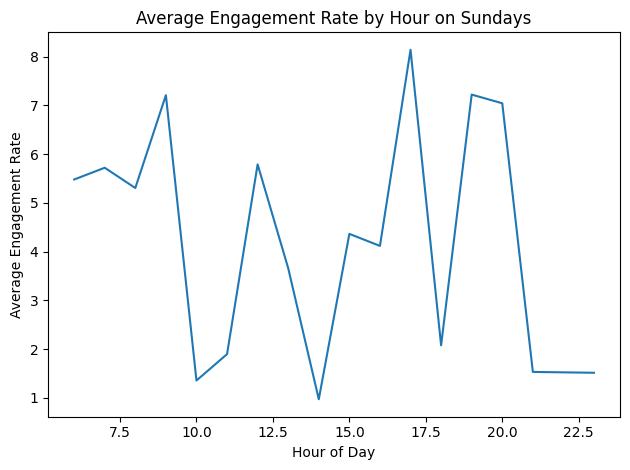

In [186]:
# Filter the dataframe for Sundays
sundays_df = df[df['Published Date'].dt.day_name() == 'Sunday']

# Calculate the average engagement rate by hour
avg_engagement_by_hour = sundays_df.groupby(sundays_df['Published Date'].dt.hour)['Engagement Rate'].mean()

# Plot the average engagement rate by hour
fig, ax = plt.subplots()
avg_engagement_by_hour.plot(kind='line', ax=ax)

# Set the x-axis label and the title
ax.set_xlabel('Hour of Day')
ax.set_ylabel('Average Engagement Rate')
ax.set_title('Average Engagement Rate by Hour on Sundays')

# Display the plot
plt.tight_layout()
plt.show()


**Question 7: Define out a posting strategy for our social channels based on your discoveries.**

Based on my analysis on the dataset so far, it can be deduced that General account Photo campaign should be run on Sundays for targeting Community Engagement on Facebook page. There is no visible difference in the timings for Sunday, but we can see a peak between 5pm to 9pm in the evening. Hence by running our campaign at this time might give us better results.

**Question 8: What suggestions would you give to the social media team if they want to expand their presence (e.g. if our CSGO youtube channel is doing well should we expand to TikTok)?**

Having picked up Valorant for my analysis.


In [187]:
# Group by where Account is Valorant
valorant_df = df[df['Account'] == 'Valorant']
valorant_df.head()


# Group by Account Type and calculate the sum of Engagement Rate
engagement_rate_by_account_type = valorant_df.groupby('Media Type')['Engagement Rate'].mean()

# Sort the account types based on the total engagement rate
sorted_account_types = engagement_rate_by_account_type.sort_values(ascending=False)
print(sorted_account_types)
# Retrieve the account type with the highest engagement rate
best_account_type = sorted_account_types.index[0]

print("Account Type with the Highest Engagement Rate:", best_account_type)

Media Type
Video    4.220736
Link     0.000000
Text     0.000000
Name: Engagement Rate, dtype: float64
Account Type with the Highest Engagement Rate: Video


In [188]:
# Group by Account Type and calculate the sum of Engagement Rate to find out which platform is it currently performing good.
engagement_rate_by_account_type = valorant_df.groupby('Account Type')['Engagement Rate'].mean()

# Sort the account types based on the total engagement rate
sorted_account_types = engagement_rate_by_account_type.sort_values(ascending=False)
print(sorted_account_types)
# Retrieve the account type with the highest engagement rate
best_account_type = sorted_account_types.index[0]

print("Account Type with the Highest Engagement Rate:", best_account_type)

Account Type
YOUTUBE    3.024861
Name: Engagement Rate, dtype: float64
Account Type with the Highest Engagement Rate: YOUTUBE


In [189]:
# Now we will subset based on video

med_df = df[df['Media Type'] == 'Video']
med_df.head()

,Published Date,Account,Account Type,Campaign Name,Total Impressions,Total Engagements,Media Type,Engagement Rate,Day of Week,Hour of Day
4,2023-03-31 19:43:00,CSGO,TWITTER,CSGO,9517,1215,Video,12.766628,Friday,19
7,2023-03-31 19:23:00,CSGO,TWITTER,CSGO,17892,3076,Video,17.192041,Friday,19
8,2023-03-31 19:15:00,CSGO,TWITTER,CSGO,0,0,Video,0.000000,Friday,19
9,2023-03-31 18:55:00,CSGO,TWITTER,CSGO,13874,1447,Video,10.429581,Friday,18
27,2023-03-31 15:11:00,DOTA2,TWITTER,DOTA2,1242,28,Video,2.254428,Friday,15


In [190]:
# Group by Account Type and calculate the sum of Engagement Rate to find out which platforms it can target now and in the future to get better results
engagement_rate_by_account_type = med_df.groupby('Account Type')['Engagement Rate'].mean()

# Sort the account types based on the total engagement rate
sorted_account_types = engagement_rate_by_account_type.sort_values(ascending=False)
print(sorted_account_types)
# Retrieve the account type with the highest engagement rate
best_account_type = sorted_account_types.index[0]

print("Account Type with the Highest Engagement Rate:", best_account_type)

Account Type
FBPAGE              15.059735
TIKTOK_BUSINESS      5.316753
TWITTER              4.965940
YOUTUBE              3.832879
LINKEDIN_COMPANY     2.479645
INSTAGRAM            1.141756
Name: Engagement Rate, dtype: float64
Account Type with the Highest Engagement Rate: FBPAGE


Based on my analysis so far, it can be said that Valorant had gained popularity by running video campaigns and that too on Youtube. It can now focus on runnning video campaigns by running them on Facebook page and secondly on Tiktok or Twitter. FB is likely to give 15.06% engagement while tiktok and twitter can be expected to give 5.3% and 5% engagement rates respectively.